# Исследовательский анализ данных (EDA)
## Customer Support Ticket Dataset

В этом ноутбуке проводится исследовательский анализ обращений в службу поддержки клиентов по различным технологическим продуктам.

## 1. Импорт библиотек и загрузка данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Общая информация о датасете

In [ ]:
# На всякий ограничил макс кол-во строк
df = pd.read_csv('../data/raw/customer_support_tickets_translated.csv', nrows=10000)
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Ticket Description_ru
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN,У меня проблема с {product_purchased}. Пожалуй...
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN,У меня есть проблема с {product_purchased}. По...
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,Я столкнулся с проблемой с моим {product_purch...
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,У меня проблема с {product_purchased}. Пожалуй...
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,У меня возникла проблема с {product_purchased}...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [7]:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
Ticket Description_ru              0
dtype: int64

**Вывод:**

В датасете 17 столбцов и 8469 строк (или меньше, если загружено не всё). Пропуски есть в столбцах, связанных с решением заявки и оценкой удовлетворённости.

## 3. Анализ категориальных признаков

In [8]:
cat_cols = ['Ticket Type', 'Ticket Status', 'Ticket Priority', 'Ticket Channel']
for col in cat_cols:
    # print(f'{col}:')
    print('----------')
    print(df[col].value_counts())

----------
Ticket Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64
----------
Ticket Status
Pending Customer Response    2881
Open                         2819
Closed                       2769
Name: count, dtype: int64
----------
Ticket Priority
Medium      2192
Critical    2129
High        2085
Low         2063
Name: count, dtype: int64
----------
Ticket Channel
Email           2143
Phone           2132
Social media    2121
Chat            2073
Name: count, dtype: int64


### Визуализация распределения по категориям

/tmp/ipykernel_1110/1499626814.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis');
/tmp/ipykernel_1110/1499626814.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis');
/tmp/ipykernel_1110/1499626814.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis');
/tmp/ipykernel_1110/1499626814.py:4: FutureWarning: 

Passing `palette` with

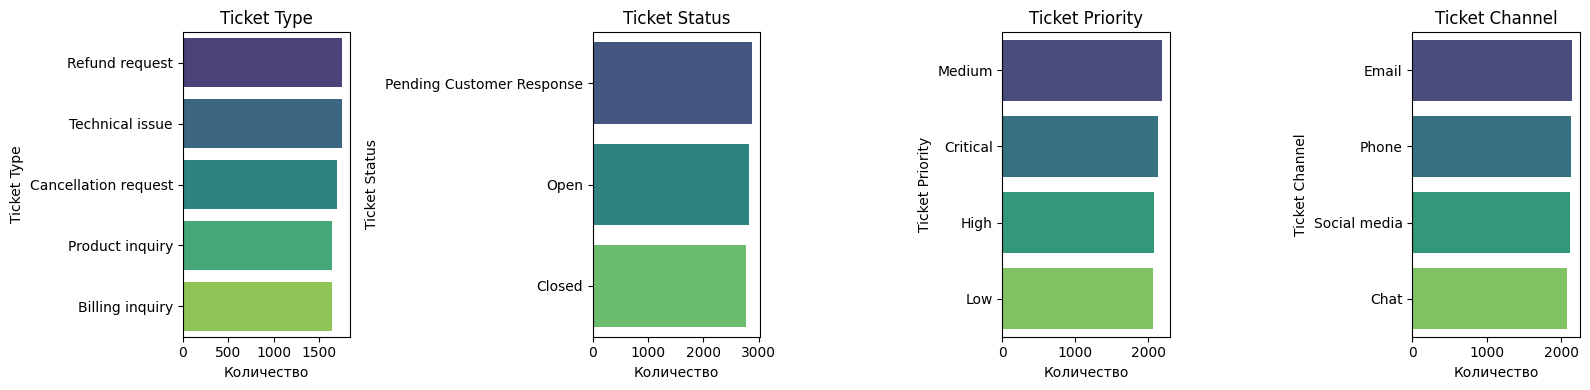

In [9]:
plt.figure(figsize=(16, 4));
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 4, i);
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis');
    plt.title(col);
    plt.xlabel('Количество');
plt.tight_layout();
plt.show();

**Вывод:**

Все основные категории (тип заявки, статус, приоритет, канал) представлены достаточно равномерно.

## 4. Кросс-таблицы и тепловые карты

### Тип заявки vs Статус заявки

In [19]:
df['Ticket Type'].value_counts()

Ticket Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64

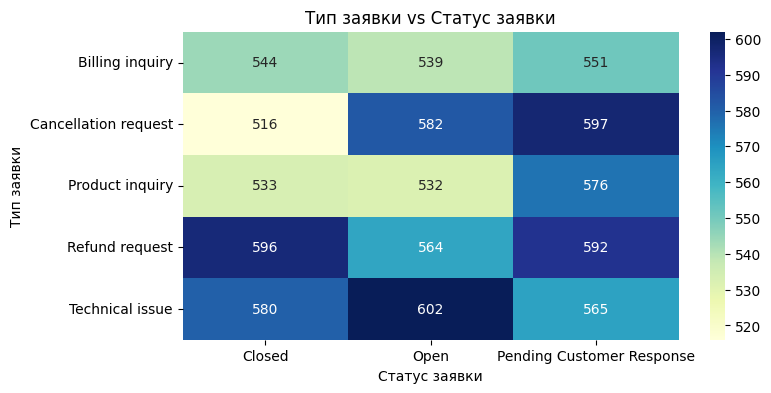

In [10]:
ct1 = pd.crosstab(df['Ticket Type'], df['Ticket Status'])
plt.figure(figsize=(8, 4))
sns.heatmap(ct1, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Тип заявки vs Статус заявки')
plt.ylabel('Тип заявки')
plt.xlabel('Статус заявки')
plt.show()

### Тип заявки vs Приоритет

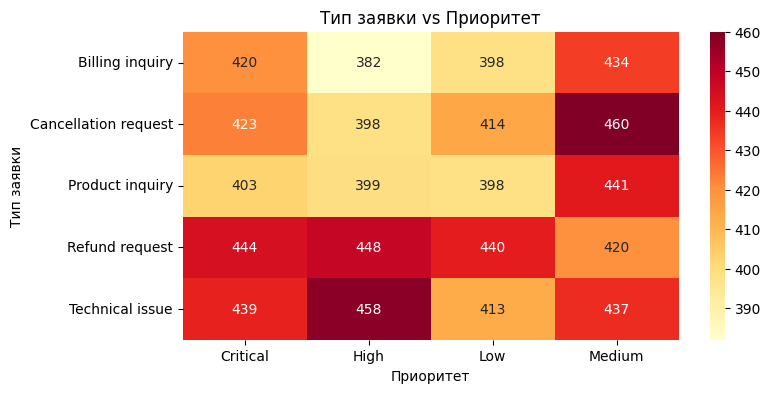

In [11]:
ct2 = pd.crosstab(df['Ticket Type'], df['Ticket Priority'])
plt.figure(figsize=(8, 4))
sns.heatmap(ct2, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Тип заявки vs Приоритет')
plt.ylabel('Тип заявки')
plt.xlabel('Приоритет')
plt.show()

### Тип заявки vs Канал обращения

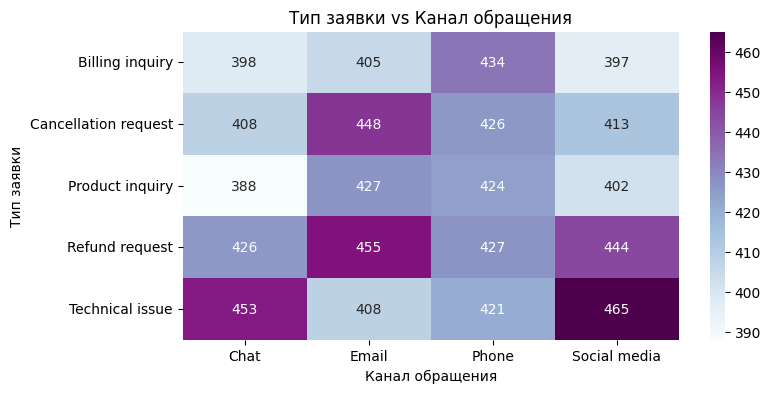

In [12]:
ct3 = pd.crosstab(df['Ticket Type'], df['Ticket Channel'])
plt.figure(figsize=(8, 4))
sns.heatmap(ct3, annot=True, fmt='d', cmap='BuPu')
plt.title('Тип заявки vs Канал обращения')
plt.ylabel('Тип заявки')
plt.xlabel('Канал обращения')
plt.show()

## 5. Анализ текстовых обращений

Посмотрим примеры описаний обращений:

In [15]:
df['Ticket Description_ru'].dropna().sample(5, random_state=42).values

array(["У меня проблема с {product_purchased}. Пожалуйста, помогите. Я использую xda-developer для чего-то другого. Если есть проблемы с {product_purchased}, скорее всего, вы не используете I've tried clearing the cache and data for the {product_purchased} app, но проблема сохраняется.",
       'У меня проблемы с подключением моего {product_purchased} к моей домашней сети Wi-Fi. Он не обнаруживает никаких сетей, хотя другие устройства подключаются в порядке. Что можно сделать, чтобы решить эту проблему? Я буду ссылаться на эту проблему Я проверил доступные обновления программного обеспечения для моего {product_purchased}, но их нет.',
       'У меня проблема с {product_purchased}. Пожалуйста, помогите. Пожалуйста, дайте кредит: @joeyclay Я обеспокоен безопасностью моего {product_purchased} и хотел бы убедиться, что мои данные в безопасности.',
       "У меня проблема с {product_purchased}. Пожалуйста, помогите. 4. Проверьте и сравните цены на продукт Вы увидите, что цены основаны на те

## 6. Выводы

- В датасете представлены пять основных типов обращений: возврат, техническая проблема, отмена, вопрос по продукту, вопрос по биллингу.
- Статусы заявок: 'Открыта', 'Закрыта', 'Ожидает ответа клиента'.
- Приоритеты и каналы обращения распределены равномерно.
- Присутствуют пропуски в данных, связанные с решением заявки и оценкой удовлетворённости.
- Датасет хорошо подходит для задач анализа клиентской поддержки, построения моделей машинного обучения и визуализации процессов поддержки.